In [1]:
library(tidyverse)
employees <- read_csv("_build/data/employee_data.csv")
employees$Salary <- parse_number(employees$Salary)
employees$Start_Date <- parse_date(employees$Start_Date, format = "%m/%d/%Y")
degreeLevels <- c("High School", "Associate's", "Bachelor's", "Master's", "Ph.D")
employees$Degree <- parse_factor(employees$Degree, levels = degreeLevels, ordered = TRUE)
carbs <- read.csv("_build/data/carbs.csv")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Rating = col_double(),
  Degree = col_character(),
  Start_Date = col_character(),
  Retired = col_logical(),
  Division = col_character(),
  Salary = col_character()
)


# Hypothesis Testing

An important component of inference is **hypothesis testing**, which allows us to analyze the evidence provided by the sample to assess some claim about the population.

+ A **one-sample hypothesis test** compares a single population parameter to a specified value. For example, you may wonder whether your local barista pours a full twelve ounces of coffee in each cup. By drawing a sample of the cups poured by your barista, you could use a one-sample hypothesis test to answer this question. 

+ A **two-sample hypothesis test** assesses the equality of parameters from two different populations. For example, you may wonder whether the barista near your home and the barista near your work pour similar amounts on average, or if one pours more than the other. By drawing a sample of the cups poured by each barista, you could use a two-sample hypothesis test to answer this question. 

## Formulating Hypotheses

Hypothesis testing consists of setting up two hypotheses, called the **null hypothesis** ($H_{o}$) and the **alternative hypothesis** ($H_{a}$). It is important to note that these hypotheses must be formulated *before* any data are observed. In the one-sample case, the null hypothesis specifies a specific value of the population parameter of interest. In the one-sample barista example above, the null hypothesis would be that on average, the barista pours twelve ounces of coffee. In the two-sample case, the null hypothesis specifies that the two parameters of interest are equal. In the two-sample barista example above, the null hypothesis would be that on average, the two baristas pour the same amount of coffee. 

The alternative hypothesis in the one-sample case expresses how the population parameter may differ from the value specified in the null. In some cases, we simply hope to test whether the population parameter is *not equal* to the value specified in the null; this is referred to as a **two-sided** test because we will reject the null hypothesis if the finding from the sample is sufficiently greater than or less than the specified value. In other cases, we hope to test whether the population parameter is *greater than* (or *less than*) the value specified in the null; these are referred to as **right-sided** (and **left-sided**) tests, respectively. For example, in the one-sample barista example the alternative is that the true average amount poured is not equal to twelve ounces, so we would run a two-sided test. If we wanted to specifically test whether our barista pours *more than* twelve ounces, we would run a right-sided test. 

For the two-sample case, a two-sided alternative hypothesis would state that the two population parameters are not equal. The right-sided alternative hypothesis would state that the population one parameter is greater than the population two parameter, and the left-sided alternative hypothesis would state the opposite. In the two-sample two-sided barista example, the alternative is that the two baristas do not pour the same amount, on average. If we wanted to test whether the home barista poured more than the work barista, we would run a right-sided test (or a left-sided test, depending on which barista we arbitrarily assign as 1).

## The Logic of Hypothesis Testing

In a hypothesis test, we start by assuming the null hypothesis is true. We then gather our evidence (data from a sample). Based on the evidence we can draw only one of two inferences: 

+ **reject** the null hypothesis $H_{o}$, or
+ **fail to reject** the null hypothesis $H_{o}$

If the data indicate we should "reject $H_{o}$," we can say that it is likely that $H_{a}$ is true. If instead the data indicate we should “fail to reject $H_{o}$”, we conclude that our sample did not provide sufficient evidence to support $H_{a}$. Note that based on sample data, we can never *accept* the null hypothesis. We can only conclude that we have insufficient evidence to reject it. This distinction is subtle but important.

The language of hypothesis tests is a bit arcane, so it can be useful to look at a concrete analog.  In the U.S. jury system, the defendant is assumed innocent unless proven otherwise.  That is, the null hypothesis is that the defendant is innocent.  Based on trial evidence, a jury can only

+ reject the null hypothesis that the defendant is innocent (that is, find that the defendant is guilty) or
+ fail to reject the null hypothesis that the defendant is innocent (that is, the defendant is acquitted).

The jury cannot conclude that the defendant is innocent (that is, that the null hypothesis is true), only that there is insufficient evidence to demonstrate that the defendant is guilty.

Formulating the null and alternative hypotheses is a challenging part of hypothesis testing. One begins by identifying an assertion about a population parameter and then translating the assertion into symbols. We give some examples of this process below.

**Problem:** Suppose that an airline company claims that the average weight of checked baggage is less than 15 pounds. To support the claim, the airline company conducts a random sample of 150 passengers and finds that the average weight of checked baggage is 14.2 pounds, with a standard deviation of 6.5 pounds. Do these data indicate that the average weight of checked baggage is less than 15 pounds? State the null and alternative hypotheses for this problem. Note that $\mu$ is the symbol for the population mean.

**Solution:** The first sentence contains an assertion about the population parameter: “the average weight of checked baggage is less than 15 pounds.” Because this is the assertion we wish to support with evidence, we write the alternative hypothesis ($H_{a}$) as $\mu < 15$ . This then implies that our null ($H_{o}$) is $\mu = 15$. 

**Problem:** Consumer Reports wants to compare the average lifetime for two brands of incandescent light bulbs. Specifically, it would like to test whether there is a difference between the average lifetime of bulbs made by each of the two companies. State the null and alternative hypotheses for this problem.

**Solution:** In symbols, let $\mu_{1}$ represent the average lifetime of bulbs of Company 1 and $\mu_{2}$ represent the average lifetime of bulbs of Company 2. Consumer Reports wonders whether there is evidence to suggest that the mean lifetime is different for the two companies, so the alternative hypothesis ($H_{a}$) would be that $\mu_{1} \ne \mu_{2}$. Our null ($H_{o}$) is then $\mu_{1} = \mu_{2}$. 

### The P-Value

The question remains of how to decide, based on our sample data, whether to reject or fail to reject the null hypothesis. This is done using probability theory by calculating what is called a **probability value**, or **p-value** for short. The p-value is always between 0 and 1 and indicates how consistent our observed  sample is with the given null hypothesis.  The higher the p-value, the more consistent our sample is with $H_{o}$; the lower the p-value, the more consistent our sample is with $H_{a}$. (Technically, the p-value tells us, if the null hypothesis is true, what the likelihood is that we would obtain a sample that is “as extreme” as the sample we gathered. Thus, a high p-value indicates that it is quite likely we would obtain a sample as extreme as ours if the null hypothesis is true, a low p-value indicates that it is unlikely we would obtain a sample like ours if the null hypothesis is true.)

We designate a threshold value for a p-value called a **significance level**, typically denoted **$\alpha$**. The convention is to set $\alpha$ = 0.05, but more generally, the choice of $\alpha$ depends upon the problem context (*e.g.*, a test comparing a new drug to an existing drug might  use a very small $\alpha$, whereas a test of a minor change might use a larger $\alpha$).

Calculating the p-value is an involved mathematical exercise; for our purposes, we will simply read it from the R output. We formally use the p-value to interpret the test results as follows:

+ If p-value $\le \alpha$ we reject the null hypothesis and say our result is statistically significant.
+ If p-value $> \alpha$ we fail to reject the null hypothesis and say our result is not statistically significant.

In what sense are we using the word *significant*? Webster’s Dictionary gives two interpretations of significance: “(1) having or signifying meaning; or (2) important or momentous.” In statistical work, significance does not necessarily imply momentous importance. For us, “significant” at the $\alpha$ level has a special meaning. It is the likelihood (or “risk”) that we reject the null hypothesis when it is in fact true.

#### Some P-Value Cautions

The American Statistical Association issued an advisory article in 2019 urging caution in how p-values are used [@PVal-cautions]. In fact, many users of statistics interpret p-values incorrectly. The p-value is not the probability that the null hypothesis is true. That would actually be a very useful value to have, but unfortunately we usually don't have the ability to find it. 

The p-value is a conditional probability that says “assuming the null hypothesis is true, how likely is it that we would draw a sample as unusual (*i.e.*, "extreme") as ours?” It does not say, “given our data, what's the chance our null hypothesis is true”, which is a source of confusion for many people. The safest way to think about a p-value is as a measure of consistency. Given my observed sample data, is it consistent with my null hypothesis view of the world? If not, then I will reject that null view of the world and conclude that the alternative view is likely the correct one.

```{warning}
The p-value is not the probability that the null hypothesis is true.
```

### Type I and Type II Errors

The point of a hypothesis test is to make the correct decision about $H_o$. Unfortunately, hypothesis testing is not a simple matter of being right or wrong. A test of hypothesis is based on sample data and probability, so there is always a chance that an error has been made. In fact, there are two primary errors one can make:

+ A **Type I error** is made if we reject $H_o$ when in fact $H_o$ is true.

+ A **Type II error** is made if we fail to reject $H_o$ when in fact $H_a$ is true.

The hypothesis test is calibrated so that the probability of making a Type I error equals $\alpha$. If we choose a significance level ($\alpha$) of 0.05, this means there is a 5% chance that our hypothesis test will mistakenly reject $H_o$, given that $H_o$ is actually true. 

The probability of making a Type II error is denoted $\beta$. For a fixed sample size, the probability of making a Type I error ($\alpha$) and the probability of making a Type II error ($\beta$) are inversely related; as $\alpha$ is increased, $\beta$ is decreased, and vice versa. Therefore, $\alpha$ cannot be arbitrarily small, since $\beta$ likely will then become large.

As we can see, the process of hypothesis testing allows you to control the risk of a Type I error
because you set the value for $\alpha$. However, (ordinarily) you do not have the same control over $\beta$, or the probability of failing to reject a null hypothesis that is actually false. For this reason, it is best to avoid making Type II errors. Therefore, rather than “accepting” $H_o$ when the sample data fail to provide sufficient evidence to overturn $H_o$, we instead say we “fail to reject” $H_o$.

### Choosing the Appropriate Test

The process we have described so far is common to all forms of hypothesis testing. We always start by defining null and alternative hypotheses, then calculate a p-value from those hypotheses using sample data. However, the statistical test we use to calculate the p-value depends on the type of data we are working with. In R, the appropriate command depends on:

+ Whether you are conducting a one-sample, two-sample, or more-than-two-sample test
+ Whether you are comparing means or proportions

The remaining sections demonstrate how to conduct the appropriate test in R for each one of these scenarios.

## One-Sample Hypothesis Testing

We use a one-sample hypothesis test when we want to compare a population parameter to a specified value. The following are all examples of scenarios where a one-sample hypothesis test would be appropriate:

+ An automobile manufacturer received a shipment of light bulbs from a supplier, and would like to verify that less than 2% of the bulbs are defective.
  + Is the true proportion ($p$) less than 0.02?
+ We would like to determine whether the majority of the electorate support the Democratic candidate for president.
  + Does the true proportion ($p$)  exceed 0.50?
+ A food processing plant received a truckload of chickens from a local farmer, and needs to verify that the average chicken weighs at least two pounds. 
  + Does the true mean ($\mu$)  exceed 2 lbs?
+ A software company wants to determine whether its users interact with the homepage for at least ten seconds, on average. 
  +  Does the true mean ($\mu$) exceed 10 seconds?
  
The first two examples concerned questions about population proportions ($p$), whereas the second two questions concern population means ($\mu$).

### Testing Means

To illustrate a one-sample test of means, let's return to our `employees` data set. Suppose that the HR department of the company is thinking about re-calibrating the employee performance scale, which is currently measured from one to ten. If the scale were calibrated properly the average score would be around five, but the team suspects there might be some "rating inflation" occurring. To investigate this, they would like to test whether the average employee `Rating` is greater than five. Under this scenario, the null and alternative hypotheses are:

+ $H_o$: The true average rating of all employees at the company is five.
  + $\mu = 5$
+ $H_a$: The true average rating of all employees at the company is *greater than* five.
  + $\mu > 5$
  
Recall that `employees` is a data frame with a random sample of 1,000 employees from the company. Using this sample data, we can apply `t.test()` to calculate the appropriate p-value for the hypothesis test:

:::{admonition} Syntax
`t.test(x, mu = 0, alternative = "two.sided")`
+ *Required arguments*
  - `x`: An atomic vector with the sample values.
+ *Optional arguments*
  - `mu`: The value of the population mean under the null hypothesis. By default, it is assumed that under the null, $\mu = 0$.
  - `alternative`: Whether one wants to conduct a two-sided, right-sided, or left-sided test. Under a right-sided test the alternative hypothesis states that the true population parameter is *greater than* the value specified in the null, so `alternative` should equal `"greater"` for a right-sided test. Following the same logic, `alternative` should equal `"less"` for a left-sided test.

Our null hypothesis states that $\mu$ equals five, so we set the `mu` parameter equal to five in the function call. Additionally, because our alternative hypothesis states that the population mean is *greater than* the value specified in the null, we are conducting a right-sided test and must set the `alternative` parameter equal to `"greater"`.

:::{code-cell}
t.test(employees$Rating, mu = 5, alternative = "greater")
:::

This p-value is quite small, so we reject the null hypothesis and conclude it is likely that the average employee rating at the company is greater than 5.

### Testing Proportions

To illustrate a one-sample test of proportions, let's focus on the second example from Section \@ref(one-sample-hypothesis-testing). Suppose we would like to determine whether the majority of the electorate supports the Democratic candidate for president. Our null and alternative hypotheses would then be:

+ $H_o$: The true population proportion of voters who support the Democratic candidate *equals* fifty percent.
  + $p = 0.5$
+ $H_a$: The true population proportion of voters who support the Democratic candidate *exceeds* fifty percent.
  + $p > 0.5$
  
Now imagine that we randomly polled 1,000 people, and 540 said that they supported the Democratic candidate. 

We can use `binom.test()` in R to calculate the appropriate p-value from this sample data:

```{admonition} Syntax
`binom.test(x, n, p = 0.5, alternative = "two.sided")`
+ *Required arguments*
  - `x`: The number of "successes" in the sample.
  - `n`: The total sample size.
+ *Optional arguments*
  - `p`: The value of the population proportion under the null hypothesis. By default, it is assumed that under the null, $p = 0.50$.
  - `alternative`: Whether one wants to conduct a two-sided, right-sided, or left-sided test. Under a right-sided test the alternative hypothesis states that the true population parameter is *greater than* the value specified in the null, so `alternative` should equal `"greater"` for a right-sided test. Following the same logic, `alternative` should equal `"less"` for a left-sided test.
```
  
Because our alternative hypothesis states that the population proportion is *greater than* the value specified in the null, we are conducting a right-sided test and must set the `alternative` parameter equal to `"greater"`.

In [2]:
binom.test(540, 1000, p = 0.5, alternative = "greater")


	Exact binomial test

data:  540 and 1000
number of successes = 540, number of trials = 1000, p-value = 0.006222
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.5135135 1.0000000
sample estimates:
probability of success 
                  0.54 


Of primary importance in this output is the p-value, which equals 0.006222. Recall that this does *not* mean there is a 0.62% chance that the null hypothesis is true. Instead, we interpret the p-value as follows: if the null were true and only half of the electorate supported the Democratic candidate, there would only be a 0.62% chance that our sample of 1,000 people would find 540 or more who support the Democratic candidate. In other words, the result we observed in the sample would be very unlikely if the null were in fact true. Therefore, we reject $H_o$ and conclude it is likely that the majority of the electorate prefer the Democratic candidate.

## Two-Sample Hypothesis Testing

Although analyzing one sample of data is useful for problems like gauging public opinion or testing the stability of a manufacturing process, there are more advanced analyses which involve comparing the responses of two or more groups. This can be in the form of comparing means or comparing proportions.

### Testing Means

Many business applications involve a comparison of two population means. For instance, a company may want to know if a new logo produces more sales than the previous logo, or a consumer group may want to test whether two major brands of food freezers differ in the average amount of electricity they use. In this section we extend our knowledge of hypothesis testing on one population mean to comparing two population means.

To use these tests you need to have a sample from each of the two populations of interest. For the tests to be valid, the samples must be randomly selected. They can be either independent or dependent. This is an important distinction, because it determines which statistical method is used and how one controls for sources of variation. **Independent samples** are selected from each population separately. If we selected a random sample of customers of one domestic gas supplier and a random sample of customers from a rival gas supplier, the samples would be independent. **Dependent samples** consist of matched or paired values that are inherently related to each other. If we selected a sample of athletes and compared their pulse rates before and after an exercise routine, the samples would be paired, or dependent, because we drew the two samples of observations from the same set of athletes. This allows us to control for the variability between athletes and focus on the pulse rate difference in each individual due to the control condition (*i.e.*, the exercise routine). The choice of independent or dependent samples depends on the context of the test. 

#### Independent Samples

The independent samples t-test is used to compare the means of two independent samples. It can be used to test whether:

+ Biology graduates have a different average annual income than chemistry graduates.
+ Length of life, on average, is shorter for never-married persons than for people who are or have been married.
+ The mean years of schooling of Republicans is different than the mean years of schooling of Democrats. 
+ Men average more hours of sleep per night than women.
+ The PE (price to earnings) ratio for tech stocks is on average higher than for financial services stocks.

When performing two sample tests of means, the null hypothesis is always that the population means of the two groups are the same. Formally, if we denote $\mu_1$ the population mean of group 1 and $\mu_2$ the population mean of group 2, our null hypothesis is $H_o:\mu_1=\mu_2$. There are three possible alternative hypotheses one can test, as listed below:

| Alternative Hypothesis | Terminology |
| :-: | :-: |
| $H_{a} :\mu_{1} -\mu_{2}$ < 0 | Left-sided |
| $H_{a} :\mu_{1} -\mu_{2}$ > 0 | Right-sided | 
| $H_{a} :\mu_{1} -\mu_{2} \ne$ 0 | Two-sided | 

As an example, the General Social Survey (GSS, link [here](http://gss.norc.org/)) has been tracking American attitudes on a wide variety of topics. With the exception of the U.S. Census, the GSS is the most frequently used source of information about American society. The surveys are now conducted every other year and measure hundreds of variables on thousands of observations. We have this data loaded into a data frame called `gss`:

In [3]:
gss <- read.csv("_build/data/gss_data.csv")
head(gss[,c("ID", "WRKGOVT", "HRS", "INCOME", "CUREMPYR")])

ID,WRKGOVT,HRS,INCOME,CUREMPYR
1,2,NA,NA,NA
2,2,40,82500,3
3,2,35,45000,10
4,1,NA,16250,NA
5,2,43,32500,3
6,2,NA,NA,NA


These variables are defined as follows:

+ `ID`: The unique ID of each observation
+ `WRKGOVT`: 1 = Government, 2 = Private
+ `HRS`: Hours worked per week
+ `INCOME`: Yearly income from primary job
+ `CUREMPYR`: How many years the employee has been with their current employer

Suppose we want to test if people who work for the government earn more than those who have private-sector jobs. Because we are testing whether the mean in group 1 (government workers) is *greater* than the mean in group 2 (private-sector workers), our hypotheses are:

+ $H_{o}$: On average, government workers earn the same as those in the private sector.
  + $\mu_1 = \mu_2$
+ $H_{a}$: On average, government workers earn more than those in the private sector.
  + $\mu_1 > \mu_2$

Fortunately, we can use the same `t.test()` function that we saw in Section \@ref(testing-means) to conduct a two-sample test of means. For a two-sample test, the syntax is slightly different. Assuming our data is saved in a data frame called `df`:

```{admonition} Syntax
`t.test(df$var ~ df$group, alternative = "two.sided")`
+ *Required arguments*
  - `df$var`: The variable of interest (*i.e.*, the variable we are comparing across the two samples).
  - `df$group`: The sample membership of each observation (*i.e.*, whether each observation belongs to sample one or sample two).
+ *Optional arguments*
  - `alternative`: Whether one wants to conduct a two-sided, right-sided, or left-sided test. Under a right-sided test the alternative hypothesis states that the true population parameter of the second group is *greater than* the true population parameter of the first group, so `alternative` should equal `"greater"` for a right-sided test. Following the same logic, `alternative` should equal `"less"` for a left-sided test.
```

Applying this to the `gss` data:

In [4]:
t.test(gss$INCOME ~ gss$WRKGOVT, alt = "greater")


	Welch Two Sample t-test

data:  gss$INCOME by gss$WRKGOVT
t = 1.497, df = 343.21, p-value = 0.06765
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -383.9179       Inf
sample estimates:
mean in group 1 mean in group 2 
       44621.83        40847.81 


From this output, we find the average yearly income for government workers (group 1) is \$44,621 and for private sector workers (group 2) is \$40,847. In the sample, government workers do indeed make more on average than private sector workers. However, using a strict threshold of $\alpha =$ 0.05, the test's p-value of 0.06765 is too large, so we would **fail to reject the null hypothesis** of equal means and conclude that there is insufficient evidence that this inequality is true in the population. The p-value is relatively low though, so some further analysis could be warranted to investigate this hypothesis (looking for and understanding outliers, taking  a slightly larger sample, etc.)

For another example, imagine we wanted to test whether there is sufficient evidence to conclude that people who currently work for the government (group 1) have been with their employer shorter or longer on average than those currently working in the private sector (group 2). Our hypotheses for this test would be:

+ $H_{o}$: $\mu_1 = \mu_2$
+ $H_{a}$: $\mu_1 \ne \mu_2$

Because we are conducting a two-sided test, we can omit the `alt` parameter in our call to `t.test()`.

In [5]:
t.test(gss$CUREMPYR ~ gss$WRKGOVT)


	Welch Two Sample t-test

data:  gss$CUREMPYR by gss$WRKGOVT
t = 3.738, df = 187.54, p-value = 0.0002462
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.517532 4.909142
sample estimates:
mean in group 1 mean in group 2 
      11.111888        7.898551 


Note that we see a difference in the means of the two samples, 11.1 years for government employees versus 7.9 for private sector employees. In this case, the small p-value for this test, 0.0002462, indicates that there is strong evidence to reject the null hypothesis of equal means. We may conclude that in 2008, it is very likely that on average, government employees had stayed at their current jobs for a different length of time than private sector employees.

#### Dependent Samples

Often we have two groups of data that are not independent but rather paired. The simplest example of paired data is a before-after test, in which each subject is measured twice, resulting in pairs of observations of the same subject. For example, we have individuals who go through a 12-week strength training program and have the amount they can bench press before and after the training program. We can't analyze these data as two independent samples because we have two measurements (pairs of data) on the same individual. We need to adjust our hypothesis test to account for the fact that the measurements are correlated. 

To see what can go wrong if paired data are not analyzed correctly, consider the following example. A company researcher wants to test a new formula for a sports drink that has been designed to improve running performance. Instead of the regular "carbohydrate-only" drink that the company currently produces, this new sports drink contains a "carbohydrate-protein" formula. The researcher would like to know whether this new carbohydrate-protein sports drink leads to a difference in running performance compared to the carbohydrate-only sports drink.

To carry out the experiment, the researcher recruited 20 middle distance runners. All of these participants performed two trials in which they had to run as far as possible for 2 hours on a treadmill. In one of the trials, each of the 20 participants drank a bottle of the carbohydrate-only formula. In the other trial, each of the same 20 participants drank a bottle of the carbohydrate-protein formula. At the end of the two trials, the distance each participant ran (in km) was recorded. The data (which is stored in a data frame called `carbs`) is shown in the table below. Do the data present sufficient evidence to indicate that the new formula is better?

<table>
 <thead>
  <tr>
   <th style="text-align:center;"> carb_only </th>
   <th style="text-align:center;"> carb_protein </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> 10.58 </td>
   <td style="text-align:center;"> 10.53 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.89 </td>
   <td style="text-align:center;"> 11.16 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.17 </td>
   <td style="text-align:center;"> 10.31 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.61 </td>
   <td style="text-align:center;"> 11.79 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.79 </td>
   <td style="text-align:center;"> 11.88 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 9.72 </td>
   <td style="text-align:center;"> 9.81 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.80 </td>
   <td style="text-align:center;"> 10.98 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.80 </td>
   <td style="text-align:center;"> 12.01 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.58 </td>
   <td style="text-align:center;"> 10.76 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.98 </td>
   <td style="text-align:center;"> 11.12 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.66 </td>
   <td style="text-align:center;"> 11.70 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 12.38 </td>
   <td style="text-align:center;"> 12.40 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.08 </td>
   <td style="text-align:center;"> 10.21 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.76 </td>
   <td style="text-align:center;"> 11.07 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.07 </td>
   <td style="text-align:center;"> 11.35 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.75 </td>
   <td style="text-align:center;"> 11.77 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.25 </td>
   <td style="text-align:center;"> 11.39 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 12.15 </td>
   <td style="text-align:center;"> 12.24 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.43 </td>
   <td style="text-align:center;"> 11.52 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.93 </td>
   <td style="text-align:center;"> 12.11 </td>
  </tr>
</tbody>
</table>

At first glance this appears to be a two-sample comparison of means, where we are interested in whether the carbohydrate-protein average distance ($\mu_{2}$) is greater than the carbohydrate-only average distance ($\mu_{1}$). Therefore, our hypotheses are:

+ $H_{o}$: The carbohydrate-protein formula does *not* result in different performance than the carbohydrate-only formula.
  + $\mu_{1} = \mu_{2}$
+ $H_{a}$: The carbohydrate-protein formula results in improved performance over the carbohydrate-only formula.
  + $\mu_{1} < \mu_{2}$

Let's try using the standard two sample t-test. Because our **alt**ernative hypothesis states that the carb-only mean is *less than* the carb-protein mean, we set `alt` equal to `"less"`.

In [6]:
t.test(carbs$carb_only, carbs$carb_protein, alt = "less")


	Welch Two Sample t-test

data:  carbs$carb_only and carbs$carb_protein
t = -0.59809, df = 37.992, p-value = 0.2767
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.2482844
sample estimates:
mean of x mean of y 
  11.1690   11.3055 


Since the p-value is greater than 0.05, we fail to reject the null hypothesis and cannot conclude there is a difference in distance run after drinking each of the two drink types.

A second glance at the data reveals an inconsistency with this conclusion. We note that the distance measurement for the carb-only drink is larger than the corresponding value for the carb-protein drink for every observation except row #1. We can see this even more clearly in the visualization below, which shows the difference between the distances run by each runner after the carb-only and carb-protein drinks. The distance run after the carb-protein drink (plotted in green) is greater than the distance run after the carb-only drink (plotted in red) for nearly every runner.

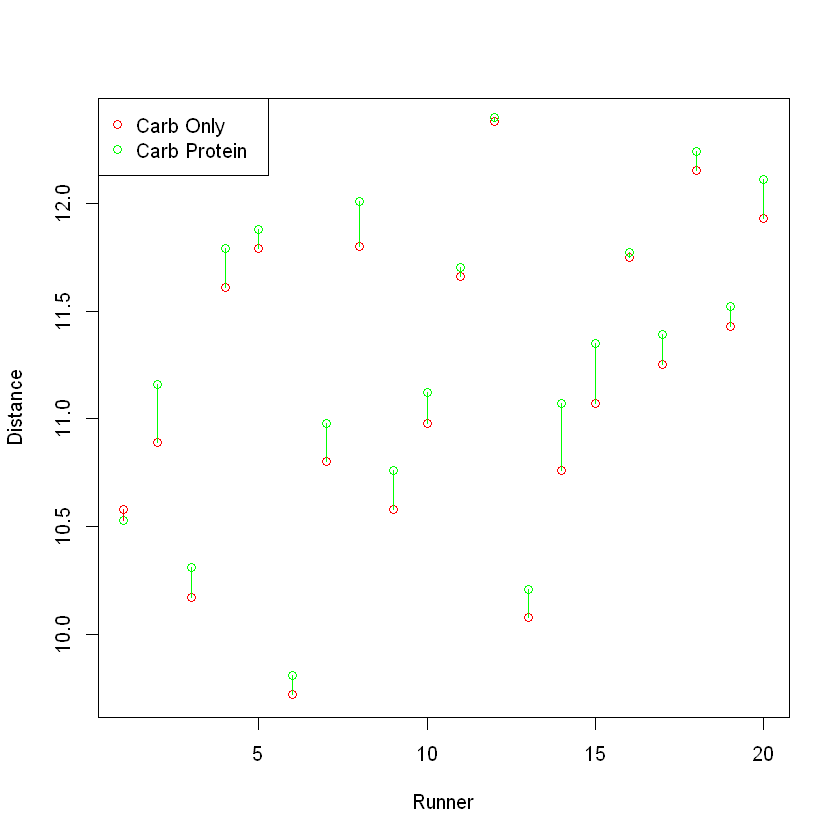

In [7]:
# In red, plot the distance run by each runner after the carb-only drink
plot(1:nrow(carbs), carbs$carb_only, col="red",
      xlab="Runner", ylab="Distance")
# In green, plot the distance run by each runner after the carb-protein drink      
points(1:nrow(carbs), carbs$carb_protein, col="green")
# Add a legend
legend("topleft", pch=c(1,1), col=c("red", "green"), legend=c("Carb Only", "Carb Protein"))
# Draw a line between the carb-only and carb-protein distance for each runner
for(i in 1:nrow(carbs)) {
  if (carbs$carb_protein[i]>carbs$carb_only[i]){
    lines(c(i,i),c(carbs$carb_only[i],carbs$carb_protein[i]),col="green")
  }
  if (carbs$carb_protein[i]<=carbs$carb_only[i]){
    lines(c(i,i),c(carbs$carb_only[i],carbs$carb_protein[i]),col="red")
  }
}

The evidence seems to imply that the carb-protein drink resulted in greater distances than the carb-only drink. Why did the two-sample t-test conclude that there was not a difference between the two drinks?

The two-sample t-test described earlier requires that the two samples be independent and random, and thus is not the right statistical test procedure for this example. Certainly, the independence requirement was violated by the manner in which the experiment was conducted. Each pair of measurements, a carb-only distance and carb-protein distance, is associated with the same runner. A glance at the data will show that the distances are of approximately the same magnitude for a particular runner, but vary from one runner to another. This, of course, is exactly what we might expect. Distance run, in a large part, is determined by a runner's stamina and muscle mass. Since each runner had a different physical ability, we might expect a large amount of variability in the distance run from one runner to another.

Since we are interested in performance variability due to the drink and not runner variability, we must conduct a **paired difference test**. This test eliminates the effect of the runner-to-runner variability and yields more information on the mean difference in the distances run for the two drink types.

Luckily, a paired t-test is easy to run. All we need to do is add a `paired` argument to the `t.test()` command as follows:

In [8]:
t.test(carbs$carb_only, carbs$carb_protein, alt = "less", paired = TRUE)


	Paired t-test

data:  carbs$carb_only and carbs$carb_protein
t = -6.6221, df = 19, p-value = 1.229e-06
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -0.100858
sample estimates:
mean of the differences 
                -0.1365 


Once we account for the fact that the measurements are paired, we find a vastly different p-value and can now reject the null hypothesis of equal means. We conclude that it is likely that, on average, runners drinking the carb-protein mixture would run farther than those who drank the carb-only drink.

### Testing Proportions

Besides comparing two population means, one might be interested in comparing two population proportions. For example, a political candidate might want to estimate the difference in the proportions of voters in two districts who favor her candidacy.

In this section we look at how to do hypothesis testing on proportions from two independent samples. Similar in spirit to the method for comparing two means, we have two population proportions which we denote $p_1$ and $p_2$. The null hypothesis is that $H_0:p_1=p_2$. As with tests of population means, there are three alternative hypotheses:

| Alternative Hypothesis | Terminology |
| :-: | :-: |
| $H_{a} :p_{1} < p_{2}$ | Left-tailed |
| $H_{a} :p_{1} > p_{2}$ | Right-tailed | 
| $H_{a} :p_{1} \ne p_{2}$ | Two-tailed |

As an example, suppose that Professor Yael and Professor Michael were both given a section of entering MBA students for a statistics boot camp before fall classes started. After the boot camp ended, a survey was given to all the participants. Of the 75 who had Yael as an instructor, 45 said they were satisfied, whereas 48 of the 90 who had Michael were satisfied. Is there a significant difference in the percentage of students who were satisfied between the two instructors? To test this, our null and alternative hypotheses would be: 

+ $H_o$: There is no difference in the proportion of satisfied students in Michael and Yael's classes.
  + $p_1 = p_2$
+ $H_a$: There is a difference in the proportion of satisfied students in Michael and Yael's classes.
  + $p_1 \ne p_2$

We can use `prop.test()` in R to calculate the appropriate p-value from this sample data:

```{admonition} Syntax
`prop.test(x = c(x1, x2), n = c(n1, n2), alternative = "two.sided")`
+ *Required arguments*
  - `x`: A vector with the number of “successes” in the two samples.
  - `n`: A vector with the sample sizes of the two samples.
+ *Optional arguments*
  - `alternative`: Whether one wants to conduct a two-sided, right-sided, or left-sided test. Under a right-sided test the alternative hypothesis states that the true population parameter is *greater than* the value specified in the null, so `alternative` should equal `"greater"` for a right-sided test. Following the same logic, `alternative` should equal `"less"` for a left-sided test.
```

In [9]:
prop.test(x = c(45, 48), n = c(75, 90))


	2-sample test for equality of proportions with continuity correction

data:  c(45, 48) out of c(75, 90)
X-squared = 0.49304, df = 1, p-value = 0.4826
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09693574  0.23026908
sample estimates:
   prop 1    prop 2 
0.6000000 0.5333333 


Since the p-value is greater than 0.05, we fail to reject the null hypothesis and cannot conclude there is a difference between the proportion of satisfied students in the two classes.

## Hypothesis Testing with More Than Two Samples

This section is optional, and will not be covered in the DSM course. Select "Click to show" to reveal. 

### Testing Means (ANOVA)

If we want to compare the means of more than two groups, one procedure available is called **Analysis of Variance (ANOVA)**. The name seems strange because we are comparing means, but the word variance comes from the fact that this procedure makes a relatively strong assumption that the variability in each group we are comparing is the same. A rule of thumb when using ANOVA is that the ratio of the largest standard deviation of the groups to the smallest standard deviation should be no more than three.

The null hypothesis for ANOVA is that the means of all our groups are the same. The alternative is that there are at least two groups that have different means. If we reject the null hypothesis we need to do further analyses to see where the differences exist.

To understand when one might use ANOVA, consider the following example. Builder's Buddy, a nationwide home improvement chain, would like to not only sell you a water heater, they would also like to install it for you. The four service centers the company runs are organized by regional markets. One question of interest is whether the employees’ training is similar in the four different markets so that the install time is roughly consistent around the country. Builder's Buddy collected data from these four different markets on the amount of time it took (in minutes) to install a standard 40-gallon water heater. That data is saved in a data frame called `waterData`, and the first few observations are shown below:

In [10]:
waterData <- read.csv("_build/data/waterheater.csv")
set.seed(201)
head(sample_n(waterData, 6))

Time,City
165,Topeka
145,Topeka
177,Richmond
179,Spokane
213,Pittsburgh
154,Spokane


Our null and alternative hypotheses for the ANOVA test are:

+ $H_o$: The mean install time is the same for all four cities.
+ $H_a$: The mean install time is *not* the same for all four cities.

We can use `summary(aov())` to calculate the appropriate p-value in R:

```{admonition} Syntax
`summary(aov(df$var ~ df$group))`
+ *Required arguments*
  - `df$var`: The variable of interest (*i.e.*, the variable we are comparing across the groups).
  - `df$group`: The group each observation belongs to.
```

Applying this to our sample data:

In [11]:
summary(aov(waterData$Time ~ waterData$City))

               Df Sum Sq Mean Sq F value Pr(>F)
waterData$City  3   1688   562.7   1.226  0.326
Residuals      20   9183   459.1               

ANOVA runs what is called an F-test, and we find from the output for our observed data the resulting p-value for this test is 0.3276. This is not below 0.05, so we fail to reject the null hypothesis that the mean install time in each city is the same. Formally, there is not enough evidence to conclude that the samples came from distributions with different means.

What if we obtain a relatively small p-value and end up rejecting the null hypothesis? We would then want to do further analysis to see where the differences in means exist. The following example shows how to do that.

**Example** An experiment was conducted as follows. In three similar cities an advertisement campaign was launched. In each city only one of the three characteristics (convenience, quality, and price) was emphasized. The weekly sales were recorded for twenty weeks following the beginning of the campaigns. The data is saved in a data frame called `sales`, and the first few observations are shown below.

In [12]:
sales <- read.csv("_build/data/juicebox.csv")
set.seed(202)
head(sample_n(sales, 6))

sales,emphasis
557,convenience
502,price
624,quality
606,convenience
719,convenience
532,price


Our null and alternative hypotheses for this test are:

+ $H_o$: The mean sales are the same for the three advertisement campaigns.
+ $H_a$: The mean sales are *not* the same for the three advertisement campaigns.

Applying this to our sample data:

In [13]:
summary(aov(sales$sales ~ sales$emphasis))

               Df Sum Sq Mean Sq F value Pr(>F)  
sales$emphasis  2  57512   28756   3.233 0.0468 *
Residuals      57 506983    8894                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The relatively low p-value of 0.0468 implies the observed data is not consistent with the null hypothesis of equal means. Therefore, we conclude that it appears not all the mean responses are the same.

The question then is where do the means differ? Before we can answer this question, we need to be aware of the **multiple testing** problem. When performing multiple hypothesis tests at the same time, the chance of making a Type I error (*i.e.*, rejecting the null hypothesis when it is actually true) increases greatly from the traditional 5%, depending on how many tests are performed. For example, if one ran three hypothesis tests at the same time, the overall Type I error would increase from 5% to 14%, even though each individual test is done at the 5% level. There are corrections to p-values that can be applied when performing multiple tests to correct for this issue. More information about this can be found [here](https://www.stat.berkeley.edu/~mgoldman/Section0402.pdf). The `pairwise.t.test()` command runs all possible two-sample t-tests, and reports p-values adjusted for the multiple comparison problem:

```{admonition} Syntax
`pairwise.t.test(df$var, df$group, p.adjust.method)`
+ *Required arguments*
  - `df$var`: The variable of interest (*i.e.*, the variable we are comparing across the groups).
  - `df$group`: The group each observation belongs to.
+ *Optional arguments*
  - `p.adjust.method`: The method used to adjust the p-values to account for multiple testing. We will use a method called the **Bonferroni correction** (see [here](https://en.wikipedia.org/wiki/Bonferroni_correction)), so we will set this parameter equal to `"bonf"`.
```

Applying this to our sample data:

In [14]:
pairwise.t.test(sales$sales, sales$emphasis, p.adjust.method = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  sales$sales and sales$emphasis 

        convenience price
price   0.904       -    
quality 0.043       0.428

P value adjustment method: bonferroni 

The numbers printed in the table within the output (0.904, 0.043, and 0.428) are the bonferroni-adjusted p-values. From this output we see the difference in sales occurred between the quality and convenience groups, as this is the only adjusted p-value below 0.05. 

### Testing Proportions (Chi-Square)

Research in business often generates frequency (count) data. This is certainly the case in most opinion surveys in which the person interviewed is asked to respond to a question by marking, say "Agree", "Not Sure", or "Disagree", or some other such collection of categories. In a case like this, the investigator might be concerned with determining what proportion of respondents marked each of the choices or whether there is any relationship between the opinion marked and the sex, age, or occupation of the respondent.

Chi-square methods make possible the meaningful analysis of frequency data by permitting the comparison of frequencies actually observed with frequencies which would be expected if the null hypothesis were true. At first glance the chi-square test procedures can be confusing as there are two different tests with very similar names.

+ **Chi-Square Goodness of Fit Test:** this is used to test if counts in different categories follow a specified distribution.
+ **Chi-Square Test of Independence:** this is used to test if two categorical variables are independent or dependent.

Using examples, we will investigate each of these tests in turn below.

**Goodness-of-Fit**

Suppose that the Bar Galaxy Chocolate Co. wants to determine if customers have a preference for any of the following four candy bars. From a random sample of 200 people, it was found that:

1. 43 preferred The Frosty Bar
2. 53 preferred Galaxy’s Milk Chocolate
3. 60 preferred Galaxy’s Special Dark Chocolate
4. 44 preferred Munchies Bar

For the goodness-of-fit test, the null hypothesis states that customers have no preference for any of the four candy bars (1, 2, 3, and 4). That is, all four candy bars are equally preferred. The alternative hypothesis states that the preference probabilities are not all the same. Formally:

+ $H_o$: $p_1 = p_2 = p_3 = p_4 = 0.25$

+ $H_a$: The data do not follow the distribution specified in $H_o$. 

The goodness-of-fit test is easily run in R with `chisq.test()`. The data we need to give the command are the observed counts (`x`) and the hypothesized proportions under the null (`p`):

```{admonition} Syntax
`chisq.test(x = c(x1, x2, x3, x4), p = c(p1, p2, p3, p4))`
+ *Required arguments*
  - `x`: A vector with the observed counts in each group.
  - `n`: A vector with the hypothesized proportions of each group under the null.
```
  
Applying this to our Bar Galaxy sample data:

In [15]:
chisq.test(x = c(43, 53, 60, 44), p = c(0.25, 0.25, 0.25, 0.25))


	Chi-squared test for given probabilities

data:  c(43, 53, 60, 44)
X-squared = 3.88, df = 3, p-value = 0.2747


Since the p-value (0.27) is quite large, there is insufficient evidence to reject the null hypothesis. That is, we cannot conclude that there appears to be a candy bar preference.

**Test of Independence**

A contingency table is a cross classification of two categorical variables. The **Chi-Square Test of Indepence** sees if there is an association between categorical variables. 

As an example, the Wall Street Journal Subscriber Study has data on the employment status of subscribers. We have data on sample results corresponding to subscribers of the Eastern and Western editions as well as employment status. This data is stored in a data frame called `wsj`, and the first few observations are shown below.

In [16]:
wsj <- read.csv("_build/data/wsj_table.csv")
set.seed(202)
head(sample_n(wsj, 6))

status,region
Full-time,Eastern Edition
Not employed,Western Edition
Part-time,Eastern Edition
Full-time,Eastern Edition
Full-time,Western Edition
Full-time,Eastern Edition


Using `prop.table()`, we can tabulate subscribers' employment status by Easter and Western edition:

In [17]:
prop.table(table(wsj$status, wsj$region), 2)

                          
                           Eastern Edition Western Edition
  Full-time                     0.59729730      0.51295800
  Not employed                  0.26216216      0.30741734
  Part-time                     0.01675676      0.01340483
  Self-employed/consultant      0.12378378      0.16621984

The proportions between regions seem similar, but we can formally check to see whether they are the same by running a chi-square test of independence. For this test, our null and alternative hypotheses would be:

+ $H_o:$ There is no association between employment status and region. 

+ $H_a:$ There is an association between employment status and region. 

To run this in R we can use the same `chisq.test()` function we saw before: 

```{admonition} Syntax
`chisq.test(df$var1, df$var2)`
+ *Required arguments*
  - `df$var1`, `df$var2`: The two categorical variables in the data frame `df` being compared.
```
  
Applying this to our Wall Street Journal data:

In [18]:
chisq.test(wsj$status, wsj$region)


	Pearson's Chi-squared test

data:  wsj$status and wsj$region
X-squared = 23.373, df = 3, p-value = 3.376e-05


The proportions per region do appear to be different and this is confirmed by the small p-value from the Chi-square test. The null hypothesis of independence is rejected, implying there is a relationship between employment status and edition of the newspaper.